In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Geocentric Metaphor: 
Linear regression is compared to a geocentric model. Just like a geocentric model simplifies the complex reality of the universe by placing the earth at the center, linear regression simplifies the complex relationships between variables by assuming a linear relationship. Despite this simplification, both models are useful for making predictions and describing relationships.


### Gaussian Error Model: 
Linear regression assumes that the errors, or the differences between the observed and predicted values, are normally distributed. This is a generalization that helps in the mathematical formulation and computation of the model. It does not provide a detailed explanation of all possible sources of errors or their distributions.

### Causal vs. Statistical Models: 
In using linear regression, it’s important to distinguish between the statistical model and the actual causal mechanisms in the real world. The statistical model, which is linear regression in this case, is used for making predictions. However, the actual causal mechanisms that operate in the real world might be more complex. Mistaking the statistical model for the actual causal mechanisms can lead to incorrect conclusions.

### Special Cases: 
Linear regression forms the basis for other statistical procedures like ANOVA (Analysis of Variance), ANCOVA (Analysis of Covariance), and t-tests. These procedures are variations of the same fundamental model, i.e., they all assume a linear relationship between variables. However, they differ in the way they summarize and interpret the results. For example, ANOVA is used to compare the means of different groups, while t-tests are used to compare the means of two groups.

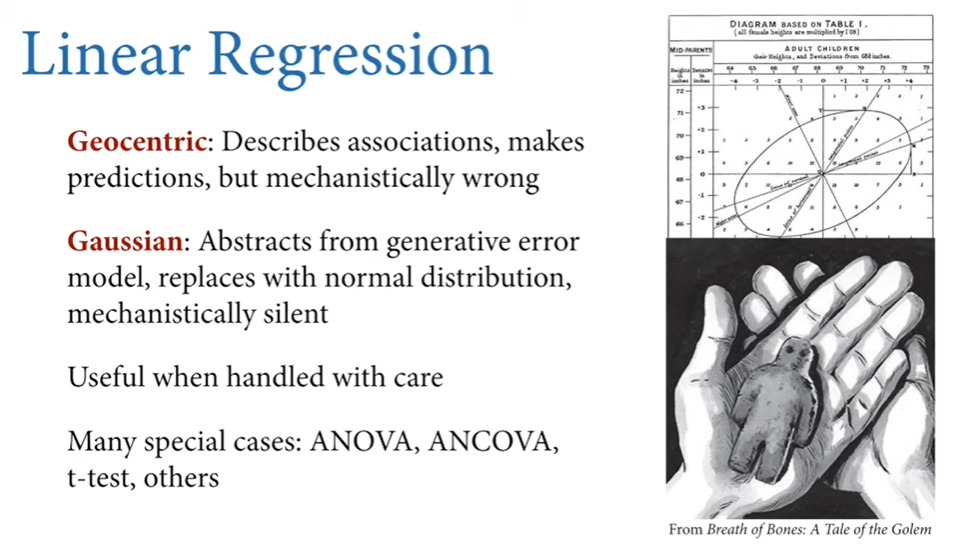

## Gaussian Distributions

### Origin of Gaussian Distributions

Gaussian distributions often arise from the addition of many small, independent fluctuations. This is demonstrated by a thought experiment where individuals flip a coin and take steps to the left or right based on the outcome. Over time, the distribution of individuals' positions tends to form a Gaussian distribution.

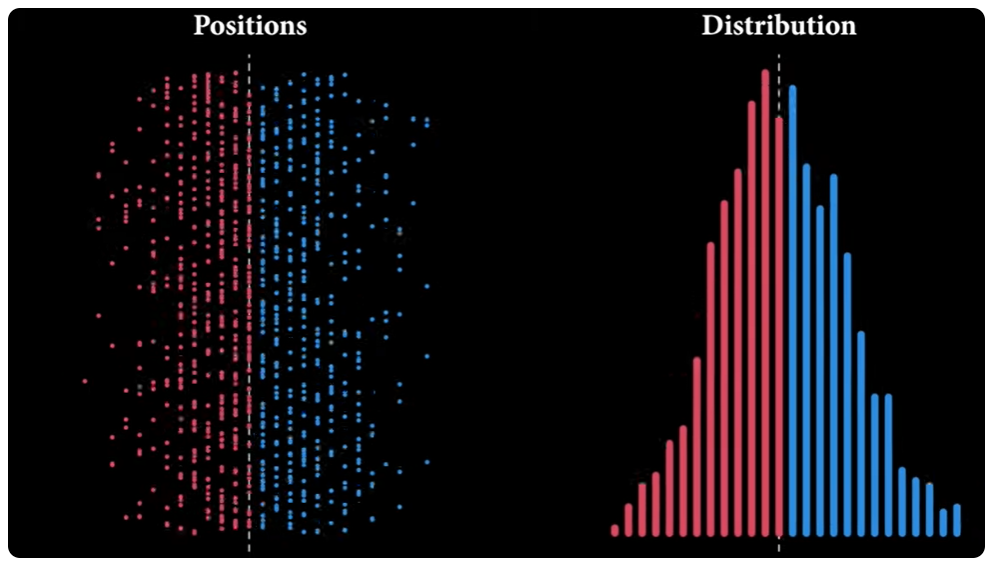

### Two Arguments for Gaussian Distributions

> Generative Argument
>> Many natural processes involve the addition of small fluctuations. For example, growth in living organisms involves yearly fluctuations in height or body mass. When we look at the size of animals in a population of the same age, they tend to have a Gaussian distribution.

> Inferential Argument
>> If our goal is to estimate the mean and variance of some variable, the Gaussian distribution is the best one to use. It is the least informative distribution, meaning it contains no other information than a mean and a variance. This makes it the most spread out distribution, covering the greatest number of possibilities.

### Usefulness of Gaussian Distributions

A variable does not have to be empirically normally distributed for the Gaussian error model to be useful statistically. It's a tool for estimating the mean and variance and is effective even if the actual distribution differs from the Gaussian distribution.

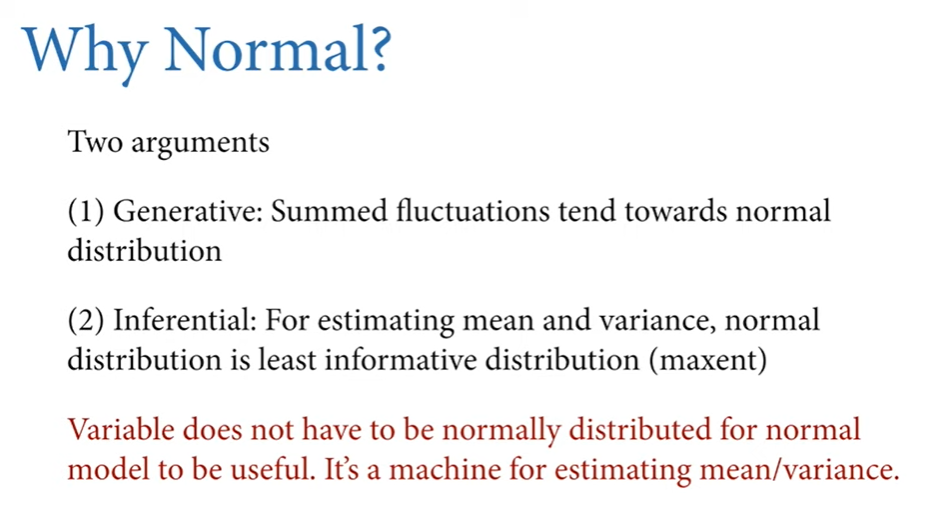

# Workflow

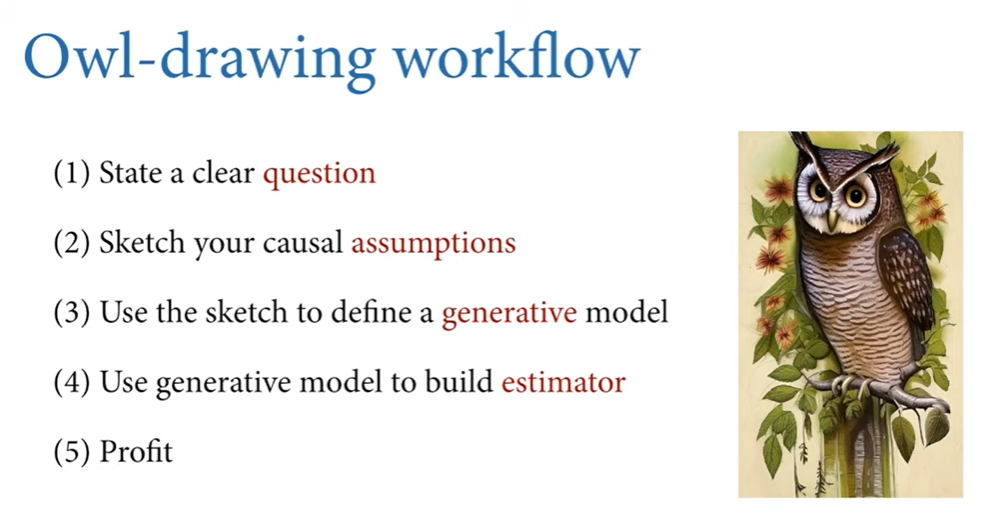

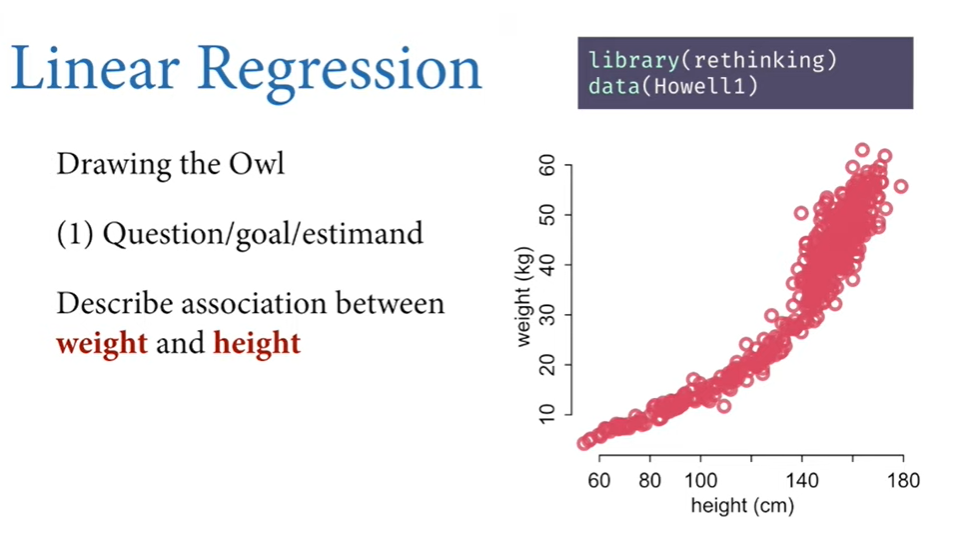

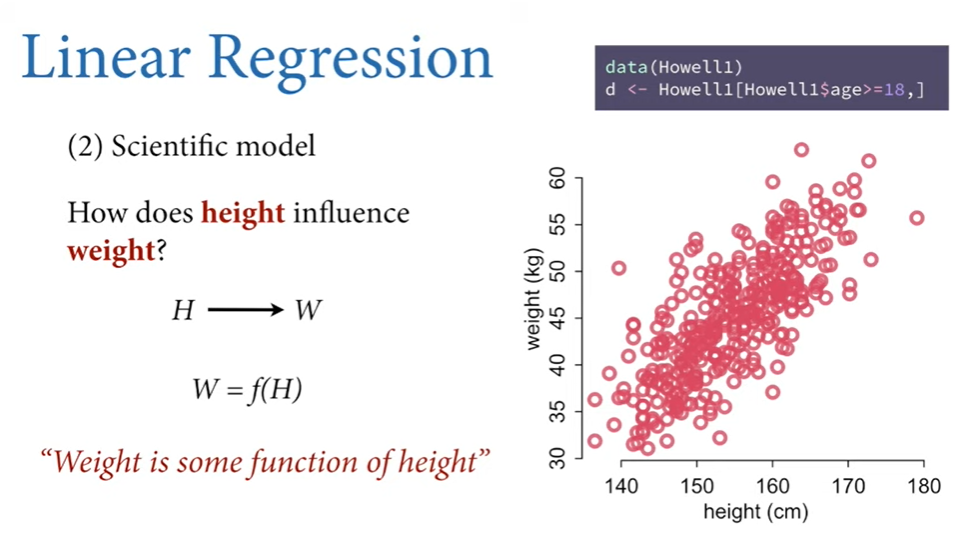

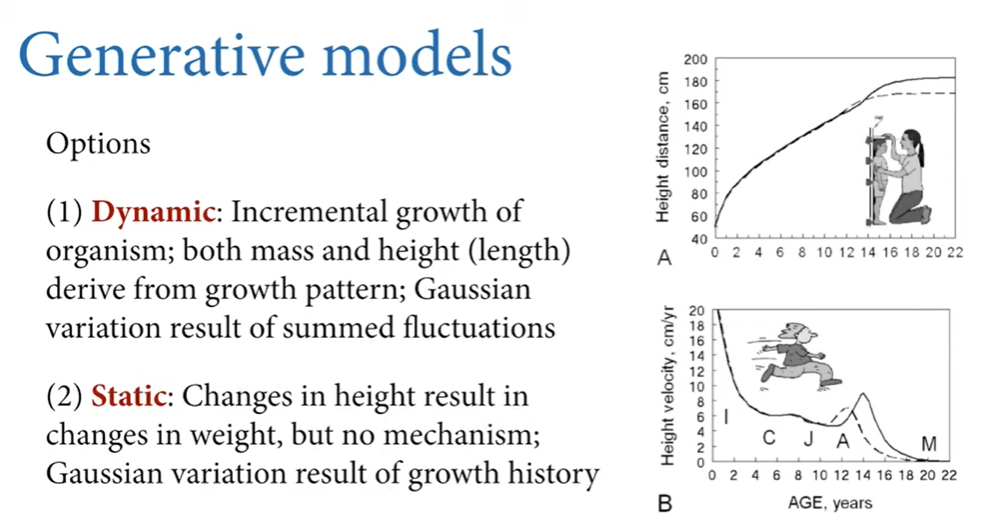

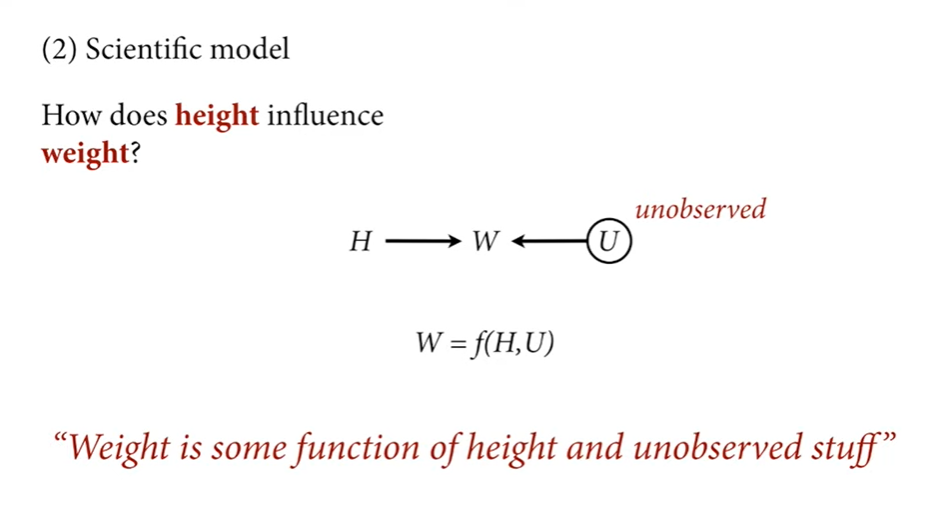

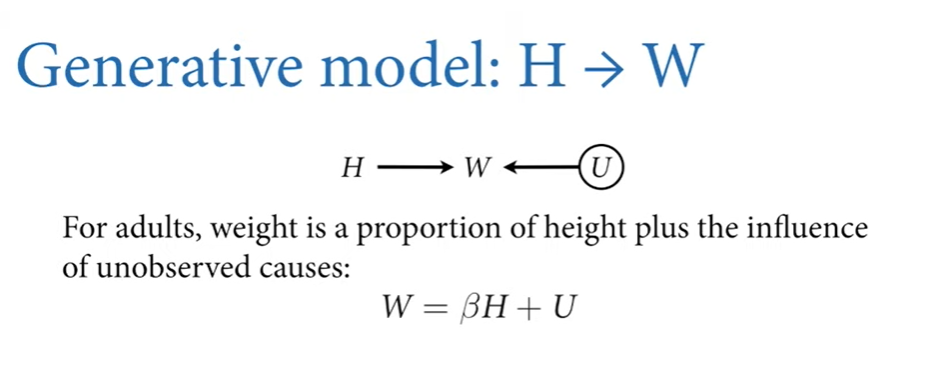

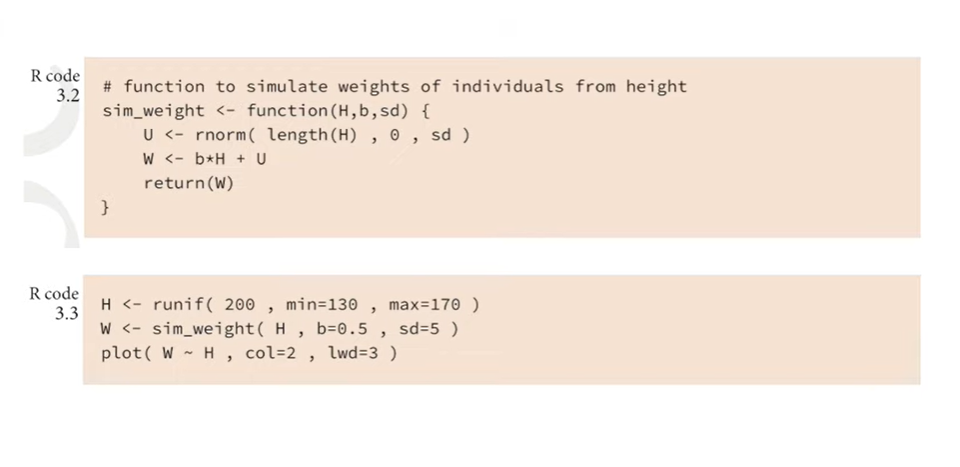

In [2]:
# function to simulate weights of individuals from height

def simulate_weights(H, b, sd):
    # Generating a random normal distribution 'U' with mean 0 and standard deviation 'sd'
    # The size of 'U' is the same as the size of 'h'
    U = np.random.normal(0, sd, len(H))
    
    # Calculating 'W' by multiplying 'b' with 'h' and adding 'U'
    W = b * H + U
    
    # Returning the calculated weights 'W'
    return W

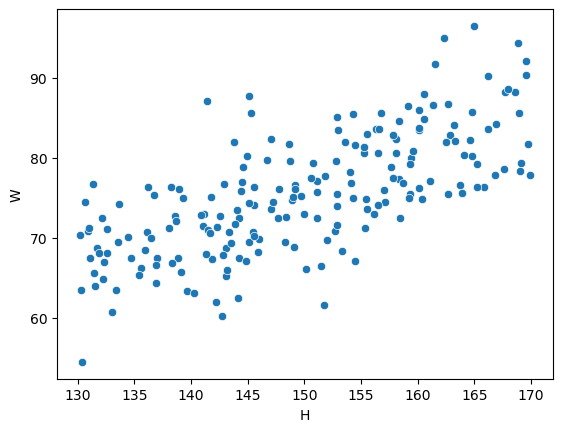

In [3]:
# This function generates random values from a uniform distribution within the specified range (low, high) and size (size)
H = np.random.uniform(low=130, high=170, size=200)
W = simulate_weights(H, b=0.5, sd=5)

sns.scatterplot(x=H, y=W)
plt.xlabel("H")
plt.ylabel("W")
plt.show()

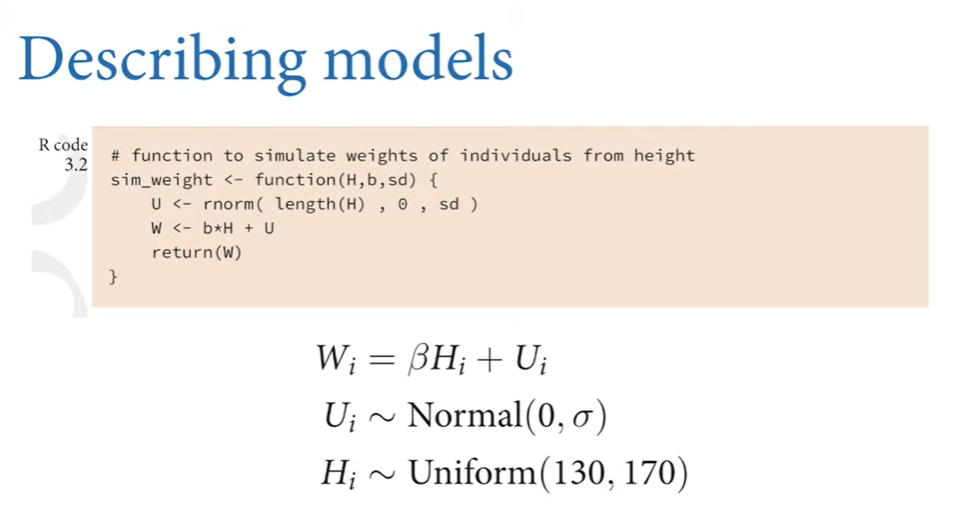

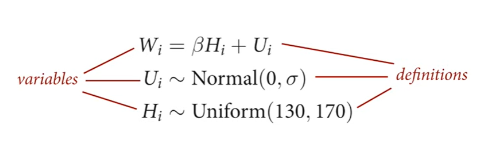

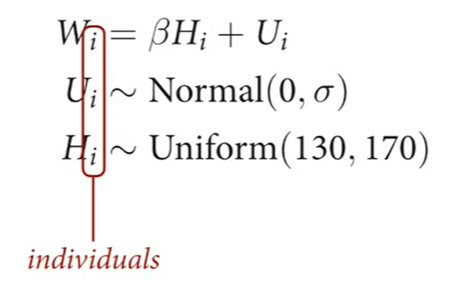

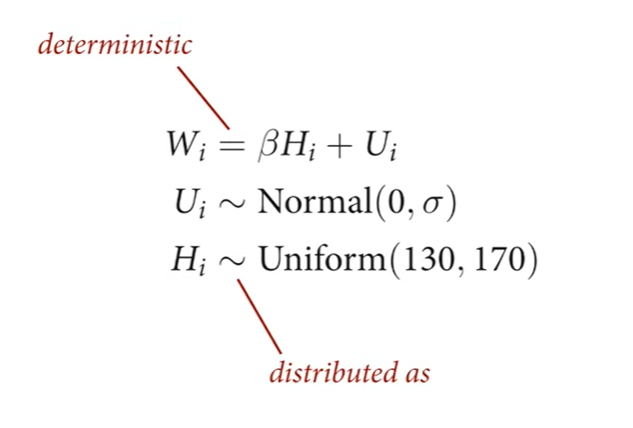

### Equation or Deterministic
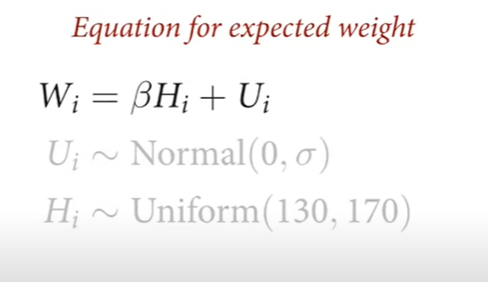

### Distribution
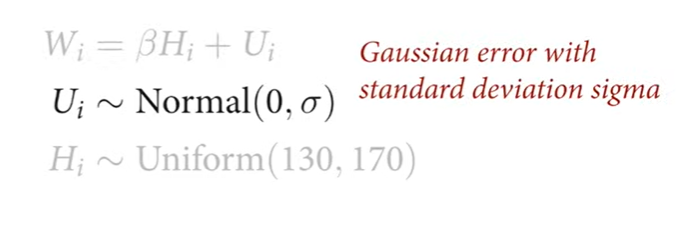

### Distribution
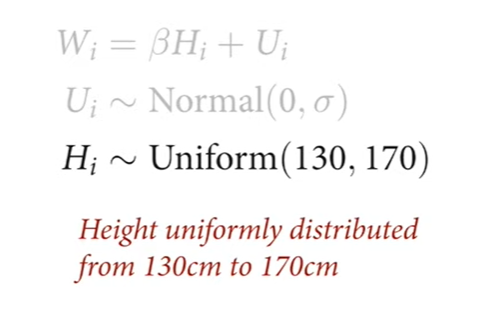

### Order
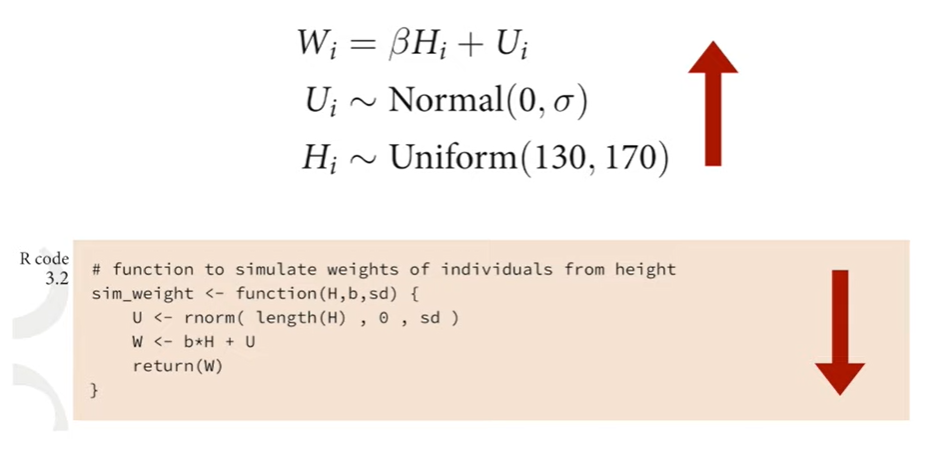

# Building the Estimator

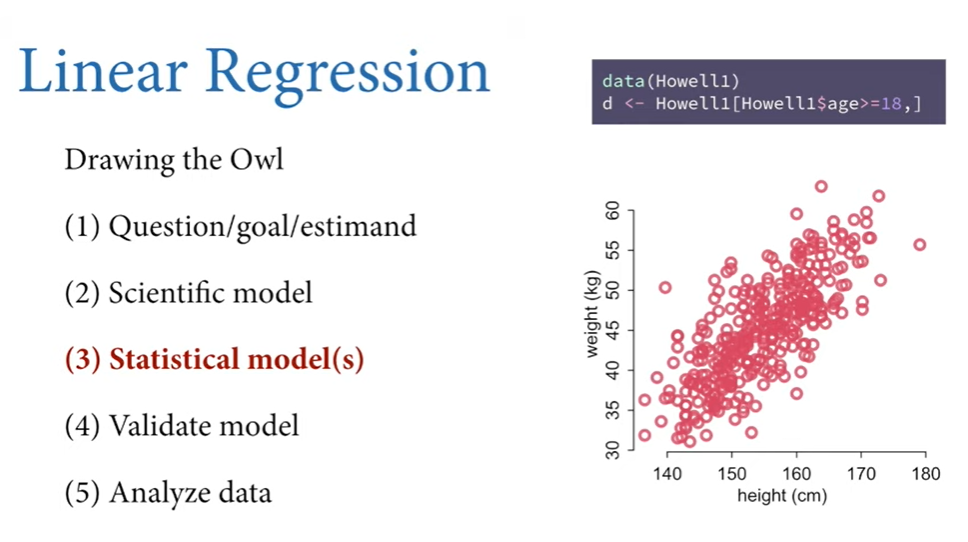

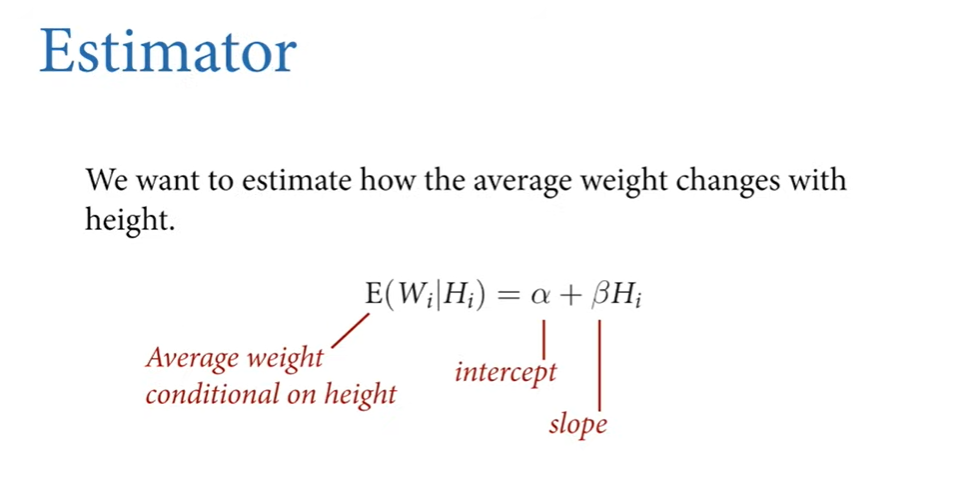

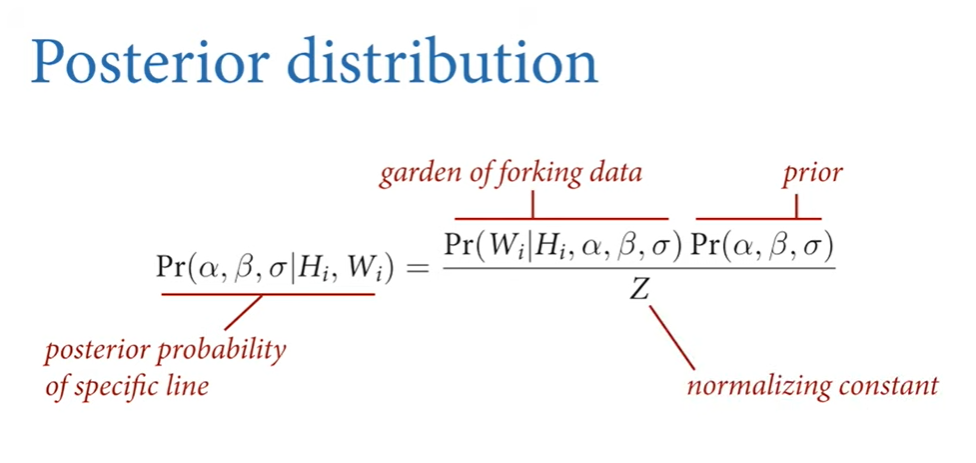

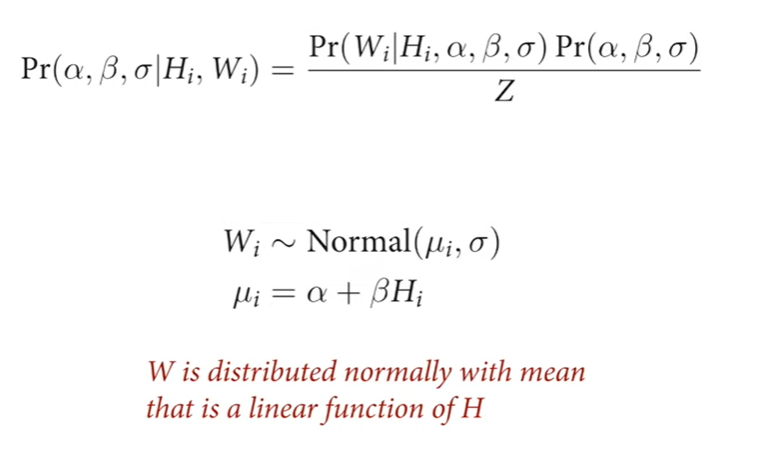

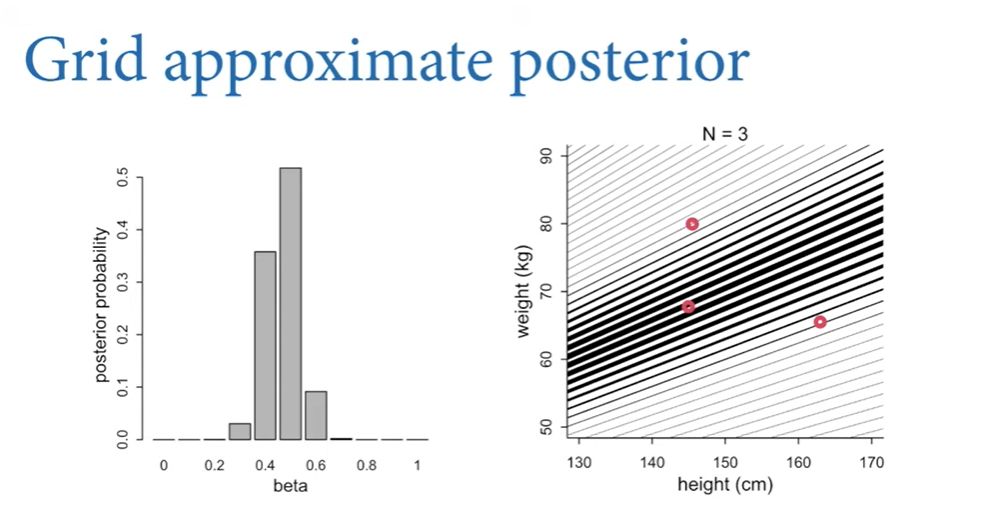

#### As we add more observations the **posterior probability** masses up on fewer lines.
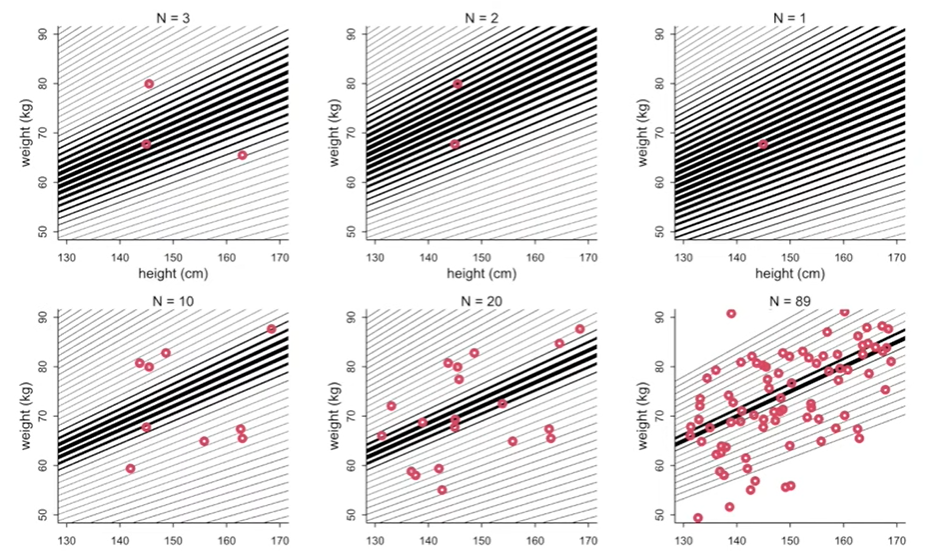

<video controls src="files/animation1.mp4" title="Anamation"></video>

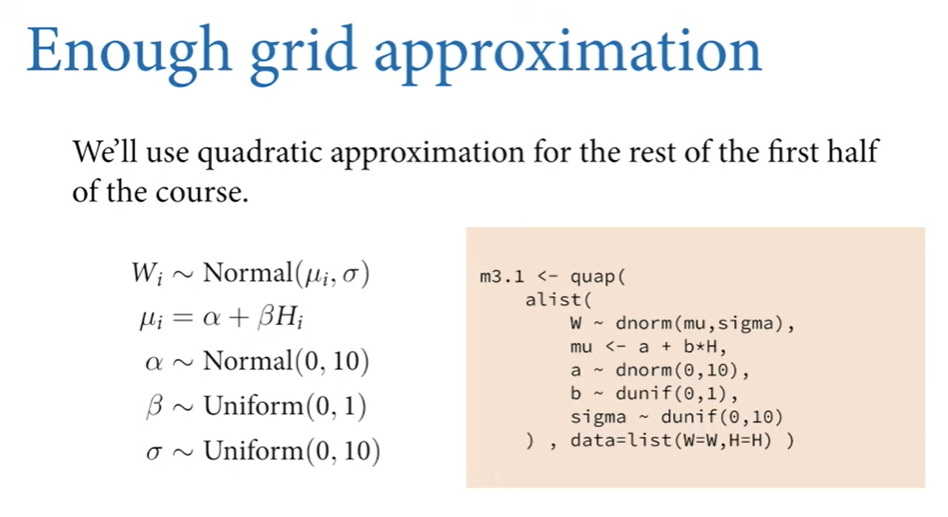

In [5]:
import pymc3 as pm
warnings.filterwarnings('ignore', category=DeprecationWarning)

with pm.Model() as model:
    # Defining the prior for the intercept 'a' using a Normal distribution
    a = pm.Normal('a', mu=0, sd=10)
    
    # Defining the prior for the slope 'b' using a Uniform distribution
    b = pm.Uniform('b', lower=0, upper=1)
    
    # Defining the prior for the standard deviation 'sigma' using a Uniform distribution
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # Defining the expected value 'mu' as a linear function of 'H'
    mu = a + b * H
    
    # Defining the likelihood of the data 'W' using a Normal distribution

    W_obs = pm.Normal('W_obs', mu=mu, sd=sigma, observed=W)

    print(model)


               a ~ Normal
    b_interval__ ~ TransformedDistribution
sigma_interval__ ~ TransformedDistribution
               b ~ Uniform
           sigma ~ Uniform
           W_obs ~ Normal


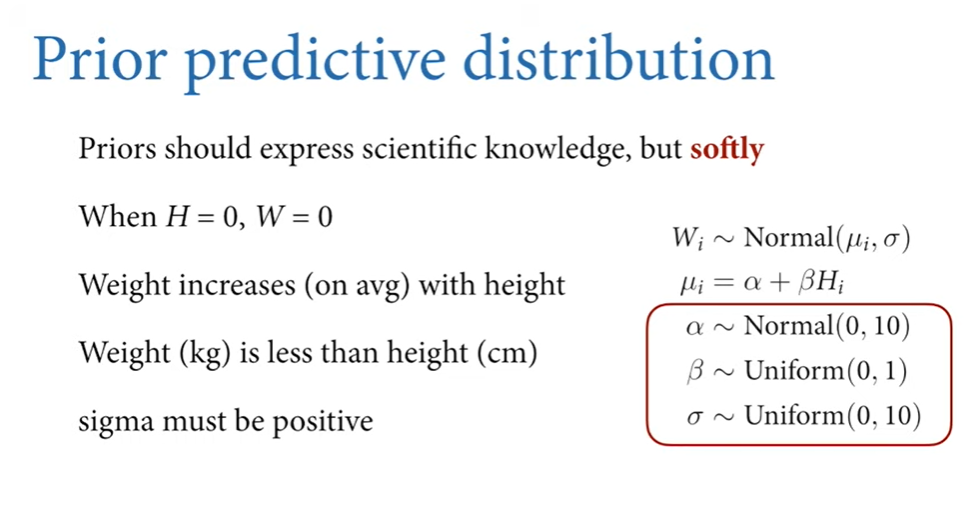

## Quadratic Approximation and Prior Predictive Distribution

### Quadratic Approximation
Quadratic approximation is a method used to approximate the posterior distribution as a multivariate Gaussian distribution. This is done because posterior distributions often resemble multivariate Gaussian distributions, especially when the sample size is reasonably large.

The term "quadratic" comes from the fact that a Gaussian distribution is quadratic in nature. In the logarithmic space, the Gaussian distribution forms a perfect parabola, hence the name.

The tool used for this process is called QWAP (Quadratic Approximation), which is part of the rethinking package. QWAP allows you to input a list of deterministic and distributional assumptions that define a statistical model. It then runs the model and finds the Gaussian approximation of the posterior distribution for the model and the data you pass it.

### Prior Predictive Distribution
Prior predictive distribution is a concept in Bayesian statistics where you make predictions based on the prior, even before the model has seen any data. The goal here is to set priors that prevent the model from making unrealistic predictions.

In the context of a model relating height and weight:
- **Intercept (α)**: This is expected to be close to zero, as someone with zero height should also have zero weight. A normal distribution centered around zero is used for α, allowing the model to adjust if the relationship doesn't hold.
- **Slope (β)**: This should be positive but less than 1, reflecting that weight generally increases with height but not as fast as height increases. A uniform distribution between zero and one is used for β.
- **Standard Deviation (σ)**: This represents variability in weight. Since standard deviations cannot be negative, σ must be positive. A uniform distribution between zero and ten is used for σ.

These priors are set based on scientific knowledge but are flexible enough to allow the model to learn from the data. The aim is not to predict exact weights but to ensure that the predictions stay within realistic bounds before any data is analyzed.

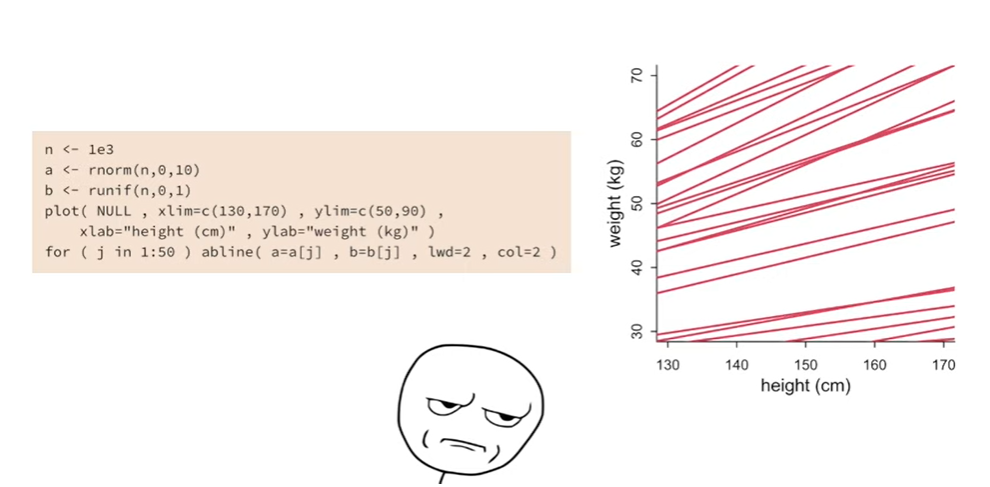

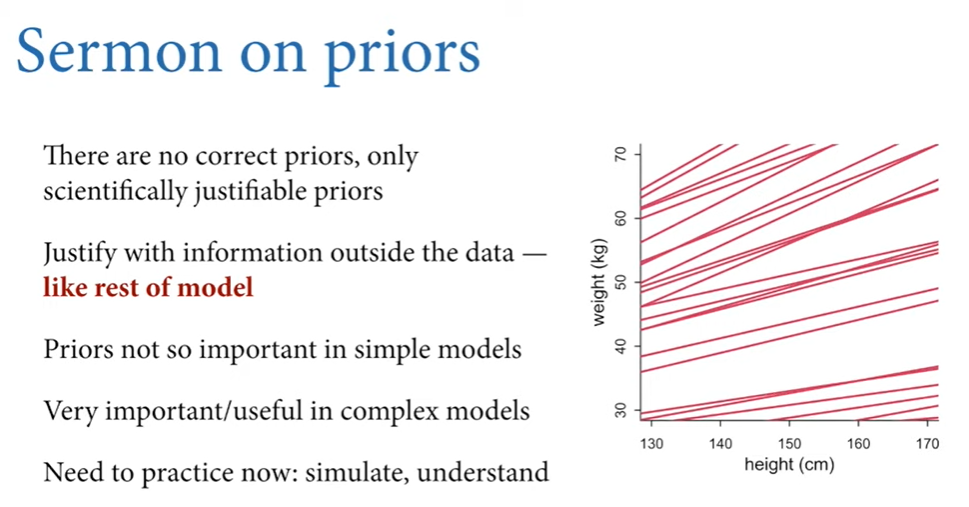

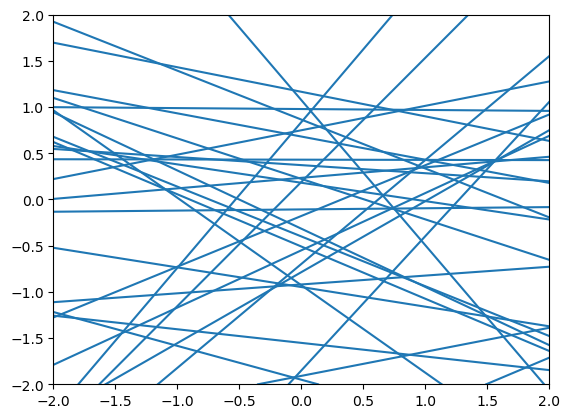

In [67]:
n = 30
alpha = np.random.normal(loc=0, scale=1, size=n)
beta  = np.random.normal(loc=0, scale=1, size=n)

fig, ax = plt.subplots()

for alpha, beta in zip(alpha,beta):
    ax.axline(xy1 = (0,alpha), slope = beta)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.show()

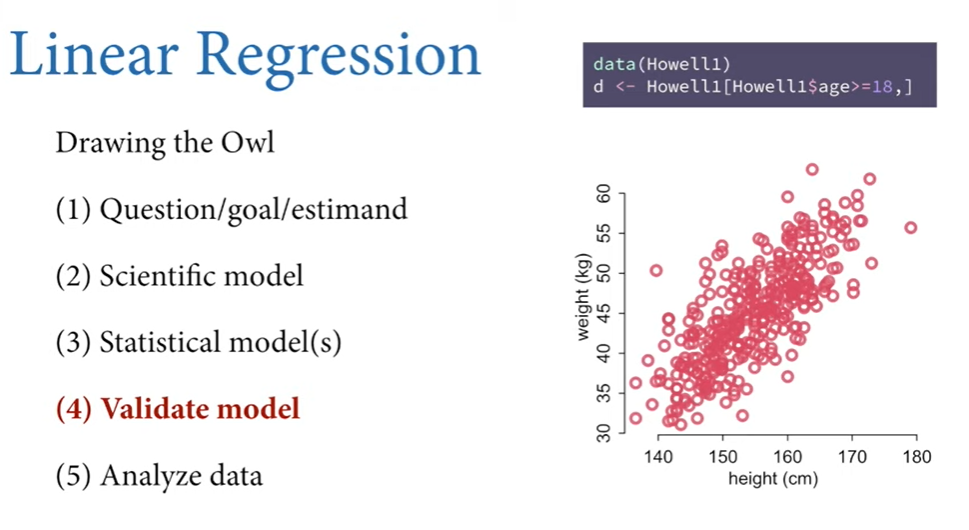

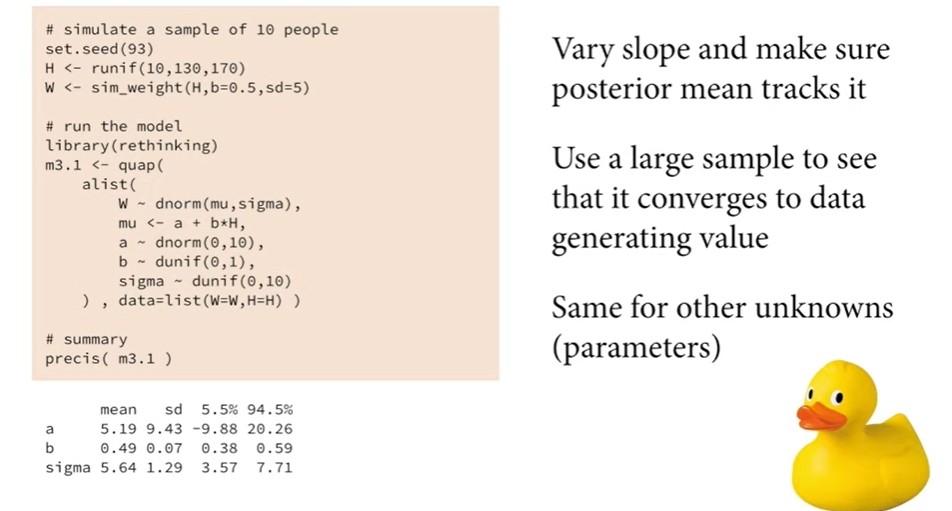

In [73]:
H = np.random.uniform(130, 170, 10)
W = simulate_weights(H, b=0.5, sd=5)

with pm.Model() as model:
    # Defining the prior for the intercept 'a' using a Normal distribution
    a = pm.Normal('a', mu=0, sd=10)
    
    # Defining the prior for the slope 'b' using a Uniform distribution
    b = pm.Uniform('b', lower=0, upper=1)
    
    # Defining the prior for the standard deviation 'sigma' using a Uniform distribution
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # Defining the expected value 'mu' as a linear function of 'H'
    mu = a + b * H
    
    # Defining the likelihood of the data 'W' using a Normal distribution
    W_obs = pm.Normal('W_obs', mu=mu, sd=sigma, observed=W)

    trace = pm.sample(10)

pm.summary(trace).round(2)

Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 10 draw iterations (4_000 + 40 draws total) took 114 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a      5.92  8.22   -6.39    22.01       2.38     1.72      12.0      20.0   
b      0.46  0.06    0.34     0.52       0.02     0.01      13.0      28.0   
sigma  4.12  0.85    3.12     5.62       0.15     0.11      52.0      61.0   

       r_hat  
a       2.05  
b       1.78  
sigma   1.18

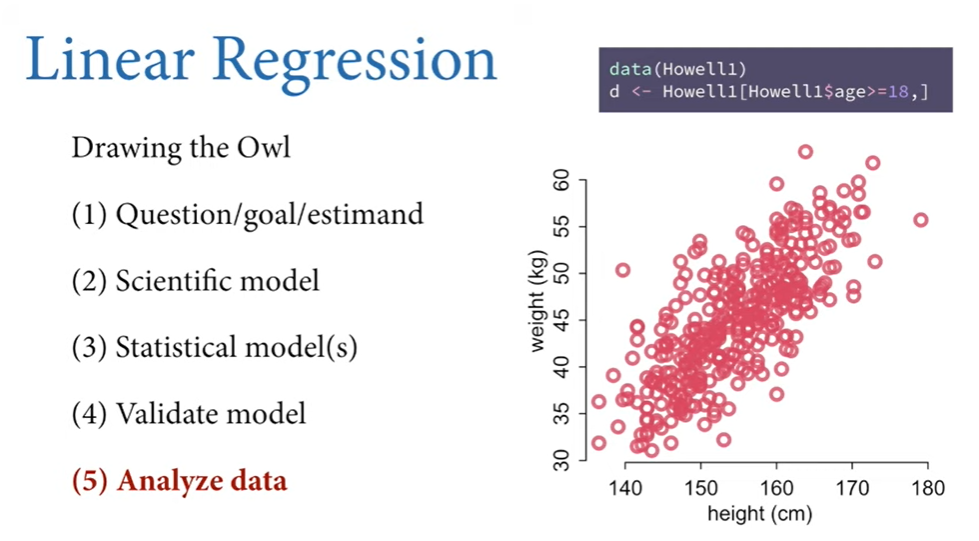

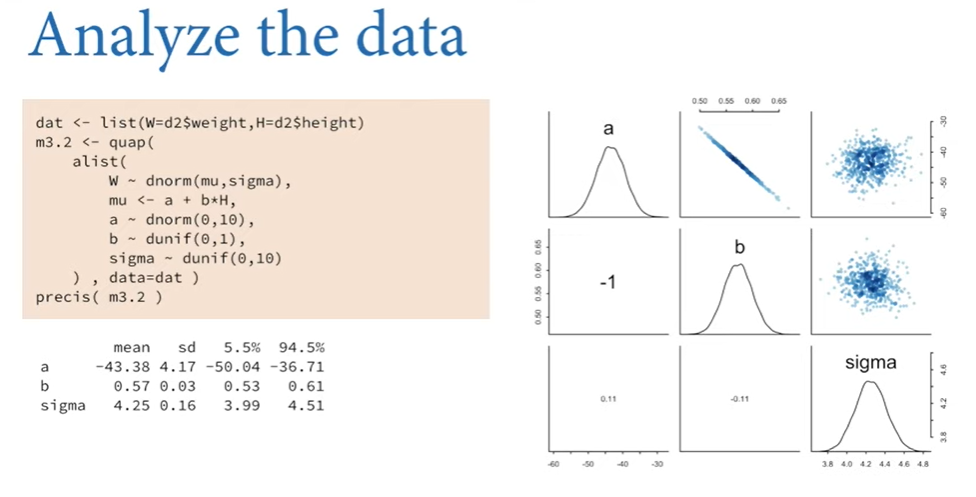

In [6]:
data = pd.read_csv("data/Howell1.csv", sep=";")
data.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0

In [9]:
data = data[:len(data)//5]

In [10]:
H = data["height"]
W = data["weight"]

with pm.Model() as model:
    # Defining the prior for the intercept 'a' using a Normal distribution
    a = pm.Normal('a', mu=0, sd=10)
    
    # Defining the prior for the slope 'b' using a Uniform distribution
    b = pm.Uniform('b', lower=0, upper=1)
    
    # Defining the prior for the standard deviation 'sigma' using a Uniform distribution
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # Defining the expected value 'mu' as a linear function of 'H'
    mu = a + b * H
    
    # Defining the likelihood of the data 'W' using a Normal distribution
    W_obs = pm.Normal('W_obs', mu=mu, sd=sigma, observed=W)

    trace = pm.sample(100)

pm.summary(trace).round(2)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 893 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.


mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a     -46.88  3.47  -53.48   -40.78       0.29     0.20     148.0     176.0   
b       0.59  0.02    0.55     0.64       0.00     0.00     146.0     185.0   
sigma   4.74  0.37    4.06     5.41       0.02     0.02     224.0     160.0   

       r_hat  
a       1.03  
b       1.03  
sigma   1.02

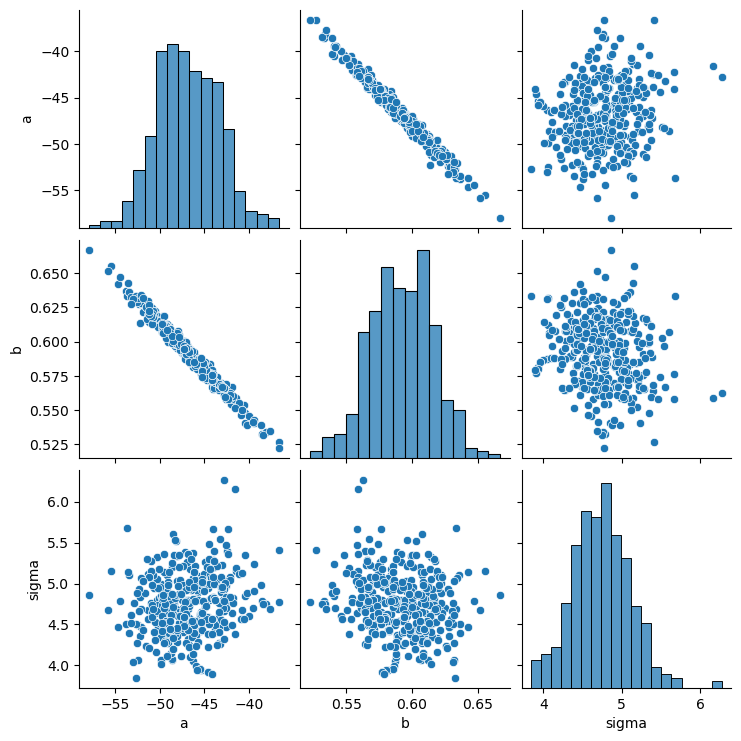

In [11]:
df_trace = pm.trace_to_dataframe(trace)
df_trace_selected = df_trace[["a", "b", "sigma"]]
sns.pairplot(df_trace_selected)
plt.show()

In [14]:
df_trace.head()

a         b     sigma
0 -49.644349  0.619018  4.333965
1 -49.177352  0.604022  4.446787
2 -45.470798  0.582197  4.420183
3 -44.597558  0.579724  4.219728
4 -47.655728  0.600157  4.418332

# Setting Up Apache and mod_wsgi for Django Deployment

## Introduction
If you are just experimenting with Django, you can utilize its built-in lightweight server for development and testing. This allows you to bypass the more complex setup of Apache during your initial learning phase.

## Using Apache with mod_wsgi
For deploying Django in a production environment, it is recommended to use **Apache** with **mod_wsgi**. `mod_wsgi` is an Apache module that provides a WSGI compliant interface for hosting Python based web applications under Apache.

### mod_wsgi Modes
`mod_wsgi` operates in two modes:

1. **Embedded Mode**
   - Similar to `mod_perl`, it embeds Python directly within the Apache server.
   - Python code is loaded into memory when the server starts and persists across requests, offering performance benefits.

2. **Daemon Mode**
   - This mode spawns a separate daemon process that handles requests, improving security by allowing the process to run as a different user than that of the web server.
   - The daemon can be restarted independently of the Apache server, which aids in seamless code updates.

### Installation and Configuration
Ensure Apache is installed and configure it to include the `mod_wsgi` module. Detailed instructions can be found in the [mod_wsgi documentation](https://modwsgi.readthedocs.io).

For specific configuration steps for Django, see the official Django documentation on [how to use Django with mod_wsgi](https://docs.djangoproject.com/en/stable/howto/deployment/wsgi/modwsgi/).

## Alternative Deployment Options
If `mod_wsgi` is not suitable, Django supports other WSGI-compliant servers such as:

- **uWSGI**: Works well with Nginx.
- **Gunicorn**: Another popular choice for Django applications.

Django is designed to adhere to the WSGI spec (PEP 3333), which ensures compatibility with a variety of server platforms.

## Conclusion
Choosing the right deployment setup is crucial for the performance and security of your Django application. Whether you opt for mod_wsgi with Apache or another server like uWSGI with Nginx, Django's flexibility allows you to tailor the deployment to meet your needs.
